Initializations

In [32]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

#setups
%matplotlib inline
sns.set()
#this will let you see all the columns that are in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

Obtaining data from ATUS dataset

In [33]:
columns_3D = [
    'TUCASEID',
    'TEAGE',
    'TESEX',
    'TESCHLVL',
    'GEMETSTA',
    'TELFS',
    'TRERNWA',
    'TUFNWGTP',
    'TRCHILDNUM',
    'TEHRUSLT',
    'TUYEAR',
]
data_chunks = pd.read_csv('data/atussum_0321.dat', iterator= True, chunksize=20000, usecols=columns_3D)

In [34]:
data = []
for data_chunk in data_chunks:
    data_append = data_chunk.rename(columns={
        'TUCASEID':'case_id',
        'TEAGE': 'age',
        'TESEX': 'sex',
        'TESCHLVL': 'school_level',
        'GEMETSTA': 'metropolitan_status',
        'TELFS': 'labor_status',
        'TRERNWA': 'weekly_earnings',
        'TUFNWGTP': 'weights',
        'TRCHILDNUM': 'num_children',
        'TEHRUSLT': 'work_hours',
        'TUYEAR': 'year',
    })
    data.append(data_append)
data = pd.concat(data)
data.loc[(data['sex'] == 1), 'sex'] = 'male'
data.loc[(data['sex'] == 2), 'sex'] = 'female'
data = data.dropna()
data.reset_index(drop=True, inplace=True)

In [41]:
data.head(10)

,case_id,metropolitan_status,age,labor_status,school_level,sex,num_children,weekly_earnings,weights,work_hours,year,age_labels,work_hours_labels
0,20030100013280,1,60,2,-1,male,0,66000,8.155463e+06,30,2003,50,50
1,20030100013344,2,41,1,-1,female,2,20000,1.735323e+06,30,2003,25,50
2,20030100013352,1,26,2,-1,female,0,20000,3.830527e+06,12,2003,0,25
3,20030100013848,2,36,4,-1,female,2,-1,6.622023e+06,-1,2003,25,0
4,20030100014165,2,51,1,-1,male,2,-1,3.068387e+06,80,2003,50,75
5,20030100014169,2,32,2,2,female,1,57600,3.455425e+06,40,2003,0,50
6,20030100014209,1,44,1,-1,female,1,-1,1.637826e+06,52,2003,25,75
7,20030100014427,1,21,1,-1,female,1,33250,6.574427e+06,40,2003,0,50
8,20030100014550,2,33,1,-1,female,3,63000,1.528296e+06,40,2003,0,50
9,20030100014758,1,39,1,-1,female,4,45000,4.277053e+06,40,2003,25,50


Visualizing three attributes in a Pair-wise scatter plot and introducing the notion of color or hue to separate out values in a categorical dimension.

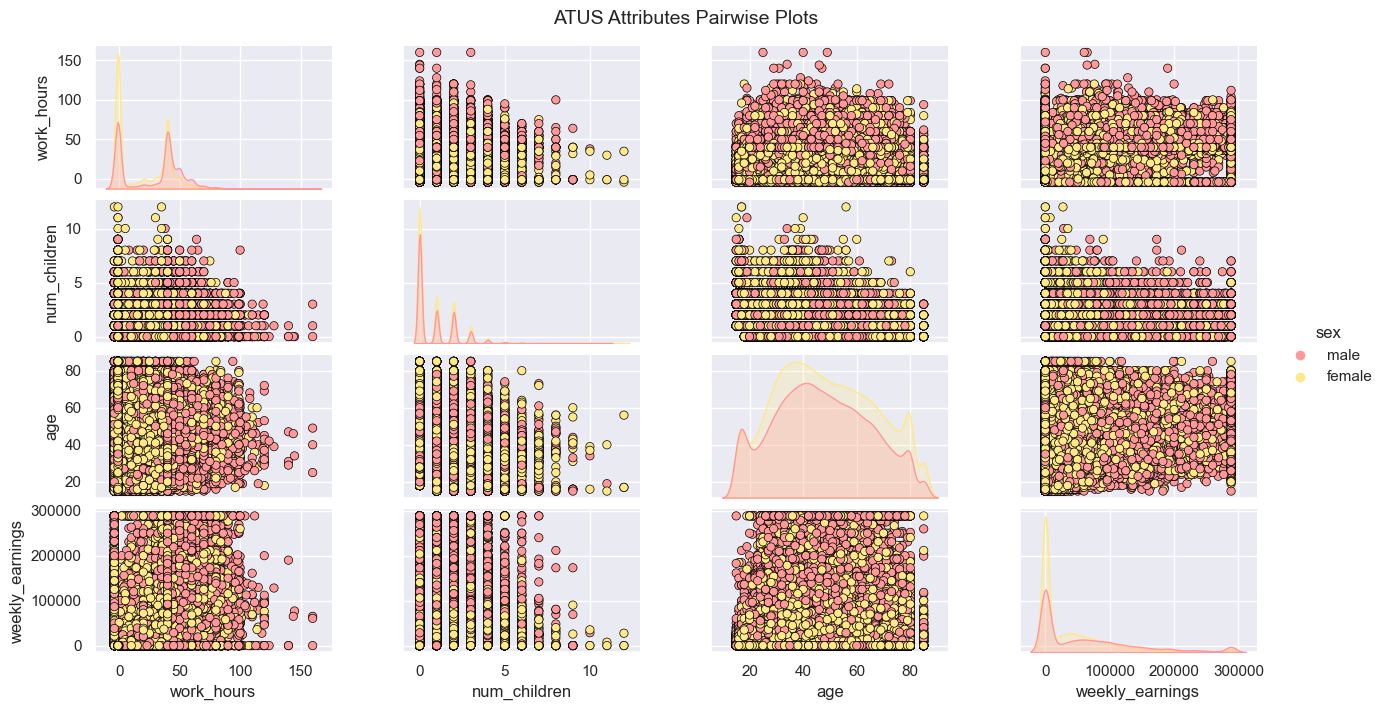

In [35]:
cols = ['work_hours', 'num_children', 'age', 'weekly_earnings', 'sex']
pp = sns.pairplot(data[cols], hue='sex', height=1.8, aspect=1.8, 
                  palette={'male': "#FF9999", 'female': "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('ATUS Attributes Pairwise Plots', fontsize=14)

The above plot enables you to check out correlations and patterns and also compare around males and females. It introduces the notion of color or hue to separate out values in a categorical dimension but let's check out a few more cases.

Visualizing three continuous, numeric attributes

Text(0.5, 0, 'weekly_earnings')

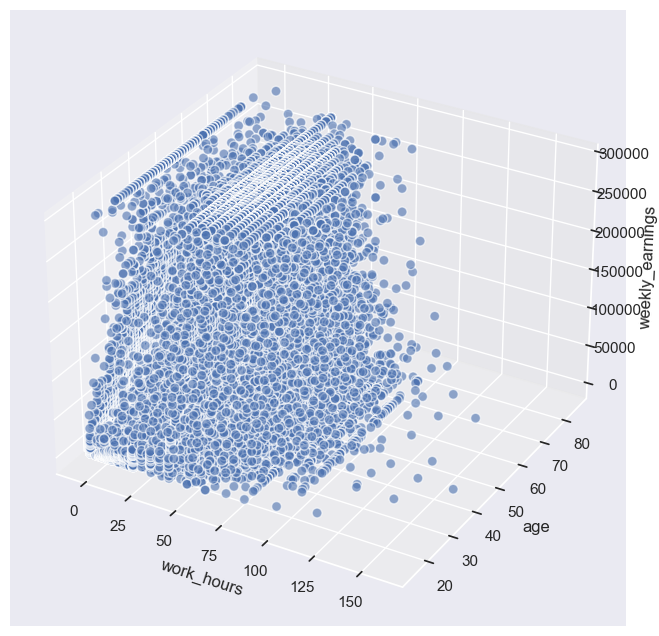

In [36]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

xs = data['work_hours']
ys = data['age']
zs = data['weekly_earnings']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('work_hours')
ax.set_ylabel('age')
ax.set_zlabel('weekly_earnings')

But this is not very effective and easy to understand. We can however leverage the regular 2-D axes for representing two continuous variables (scatter plot) and introduce the third continuous variable as a categorical variable by binning its values in fixed width bins — popularly these can be quantiles. Based on these quantiles (or bins) we can use size or even hue to represent the third variable here making it 3-D.

Text(0.5, 1.05, 'work_hours - weekly_earnings - age')

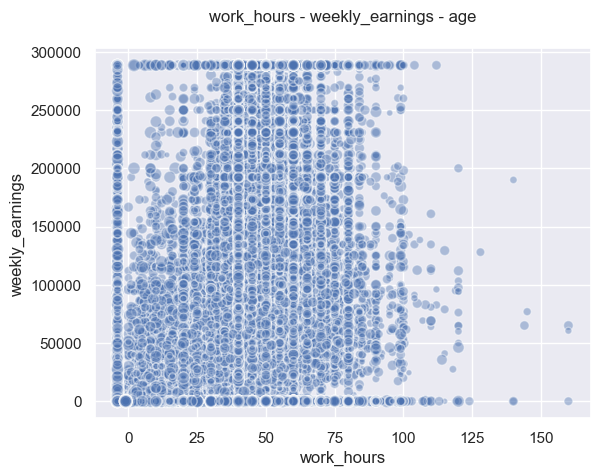

In [37]:
# using color for the 3rd dimension
plt.scatter(data['work_hours'], data['weekly_earnings'], s=data['age'], 
            alpha=0.4, edgecolors='w')

plt.xlabel('work_hours')
plt.ylabel('weekly_earnings')
plt.title('work_hours - weekly_earnings - age', y=1.05)

A better option would be to use the notion of faceting as the third dimension (essentially subplots) where each subplot indicates a specific bin from our third variable (dimension).

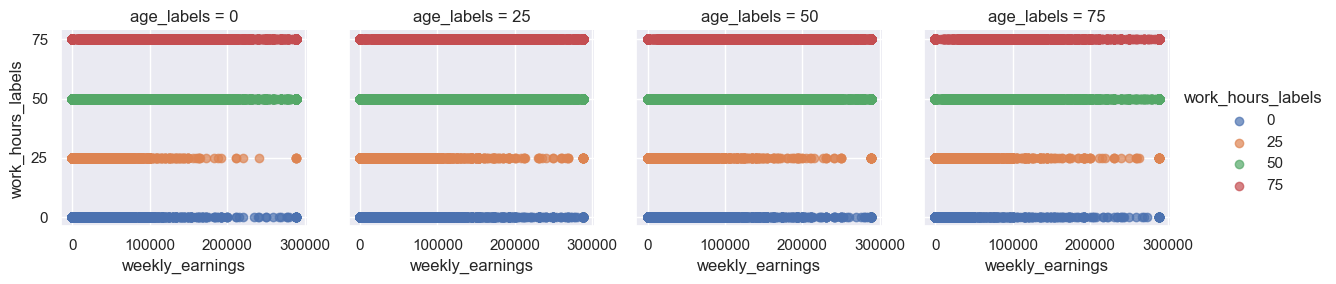

In [38]:
# example depicting representing 3-D continous data
# using color and facets
quantile_list = [0, .25, .5, .75, 1.]
quantile_labels = ['0', '25', '50', '75']
data['age_labels'] = pd.qcut(data['age'], q=quantile_list, labels=quantile_labels)
data['work_hours_labels'] = pd.qcut(data['work_hours'], q=quantile_list, labels=quantile_labels)
g = sns.FacetGrid(data, col="age_labels", hue='work_hours_labels')
g.map(plt.scatter, "weekly_earnings", "work_hours_labels", alpha=.7)
g.add_legend();

Mixed attributes (Numeric & Categorical). Considering visualization for three mixed attributes, we can use the notion of hue for separating our groups in one of the categorical attributes while using conventional visualizations like scatter plots for visualizing two dimensions for numeric attributes.

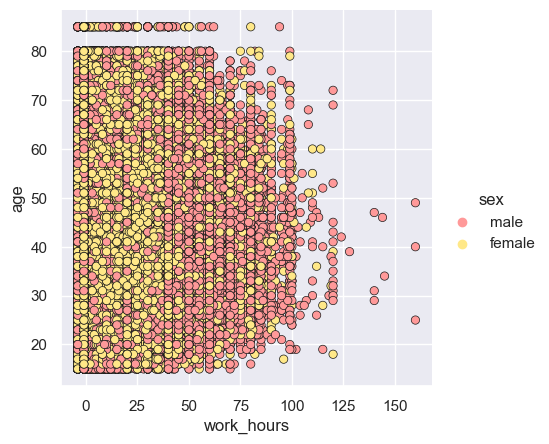

In [39]:
jp = sns.pairplot(data, x_vars=["work_hours"], y_vars=["age"], height=4.5,
                  hue="sex", palette={"male": "#FF9999", "female": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

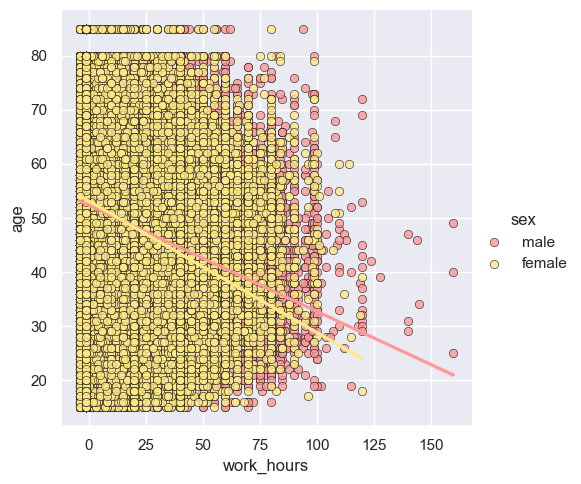

In [40]:
lp = sns.lmplot(x='work_hours', y='age', hue='sex', 
                palette={"male": "#FF9999", "female": "#FFE888"},
                data=data, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))   

Instead of a scatter plot, we can also use a kernel density plot to understand the data in three dimensions.

In [43]:
# Visualizing 3-D mix data using kernel density plots
# leveraging the concepts of hue for categorical dimension
ax = sns.kdeplot(data['work_hours'], data['age'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)
ax = sns.kdeplot(data['work_hours'], data['num_children'],
                  cmap="Reds", shade=True, shade_lowest=False)

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given